In [1]:
#参考文章
#https://blog.csdn.net/koala_tree/article/details/78725881
import re
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_data = pd.read_csv('gender_submission.csv')

1 passengerId (1~891) 训练集样本数
2 Survived (0、1) 标签值
3 Pclass (1、2、3) 客舱等级（重要指标）
4 Name（姓名：可以提取出很多信息，名门、王氏家族等）
5 Sex（female、male）（重要指标）
6 Age（0~100）（重要指标）
7 SibSp（旁系：兄弟姐妹、夫妻）（0~10）
8 Parch（直系：父母、子女）（0~10）
9 Ticket（票编号）（比较乱，有纯数字，有的带字母）
10 Fare（乘客票价）
11 Cabin（客舱编号）
12 Embarked（上船港口号）

In [3]:
train_data.info()
print("_"*40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
#age cabin embarked fare 存在缺失值,fare缺失较少,可直接填充

In [5]:
sns.set_style('whitegrid')

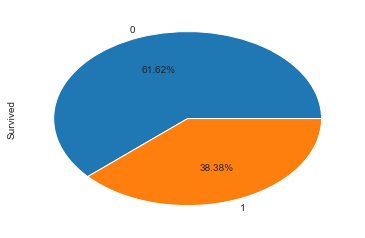

In [6]:
train_data['Survived'].value_counts().plot.pie(autopct = "%1.2f%%")

In [7]:
train_data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [8]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
train_data[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

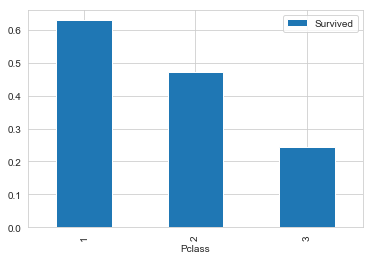

In [11]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

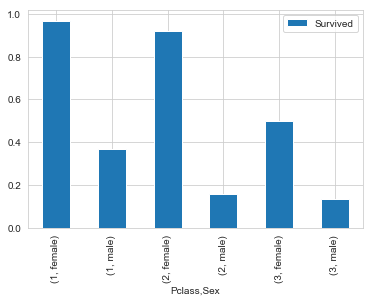

In [12]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [13]:
train_data.groupby(['Sex','Pclass','Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

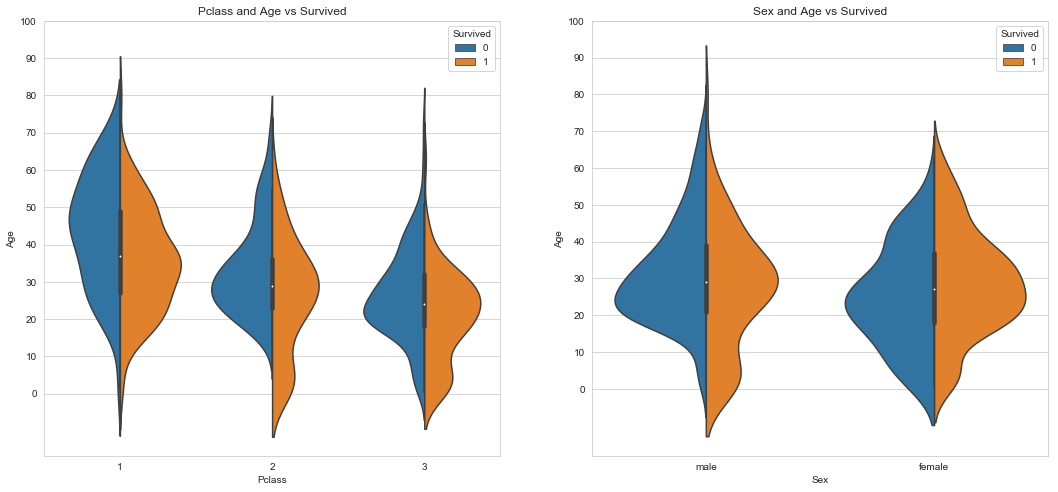

In [14]:
#年龄与存活与否的关系 age

fig,ax = plt.subplots(1,2,figsize = (18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks (range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks (range(0,110,10))
plt.show()

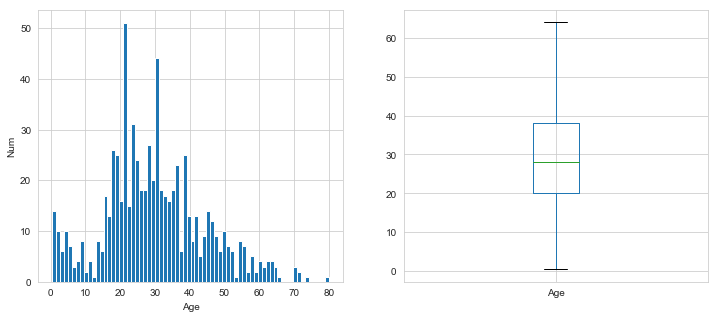

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age',showfliers=False)
plt.show()

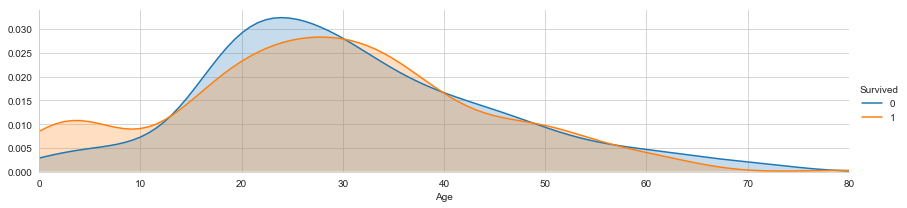

In [16]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train_data['Age'].max()))
facet.add_legend()

In [17]:
from sklearn.ensemble import RandomForestRegressor

#choosing training data to predict age
age_df = train_data[['Age','Survived','Fare','Parch','SibSp','Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

#use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data['Age'].isnull(),['Age']] = predictAges

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


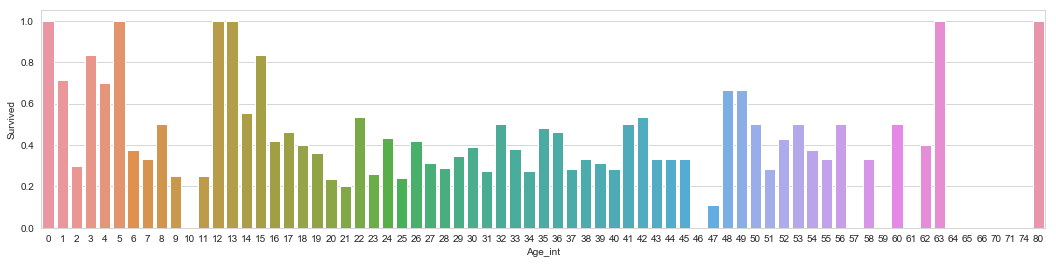

In [19]:
#average survived passengers by age
fig,axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Age_int'] = train_data['Age'].astype(int)
average_age = train_data[['Age_int','Survived']].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int',y='Survived',data=average_age)

In [20]:
train_data['Age'].describe()

count    891.000000
mean      29.661183
std       13.743062
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
bins = [0,10,20,65,100]
train_data ['Age_group'] = pd.cut(train_data['Age'],bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 10]      0.565217
(10, 20]     0.396947
(20, 65]     0.366032
(65, 100]    0.125000
Name: Survived, dtype: float64

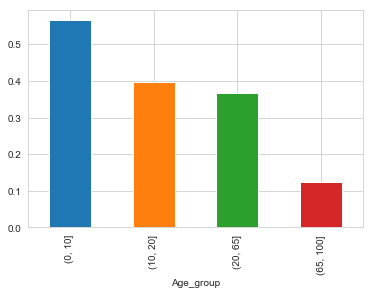

In [22]:
by_age.plot(kind='bar')

In [23]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.',expand=False)

pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


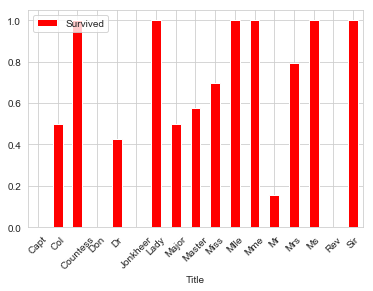

In [24]:
ax1 = train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar(color='red')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

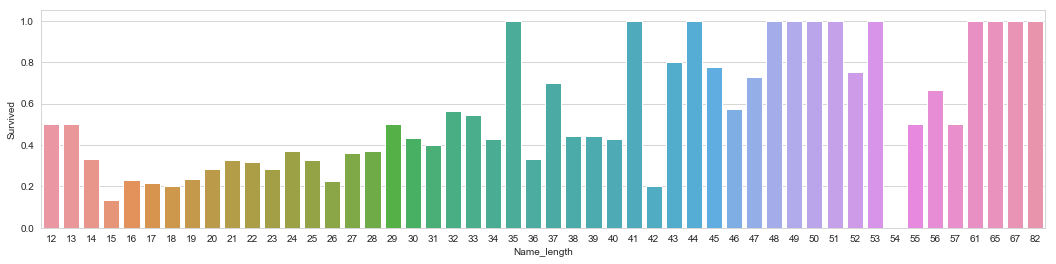

In [25]:
fig , axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length',y='Survived',data=name_length)

In [26]:
#将数据分为有兄弟姐妹和没有兄弟姐妹的两组
sibsp_df = train_data[train_data['SibSp']!=0]
no_sibsp_df = train_data[train_data['SibSp']==0]


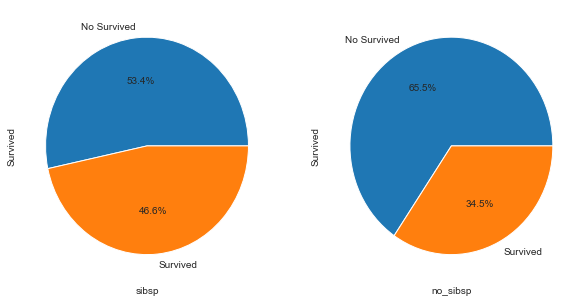

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

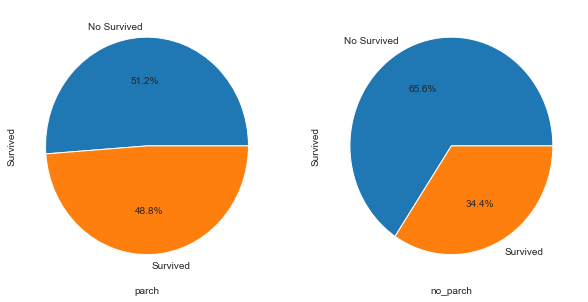

In [28]:
parch_df = train_data[train_data['Parch']!=0]
no_parch_df = train_data[train_data['Parch']==0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

Text(0.5,1,'SibSp and Survived')

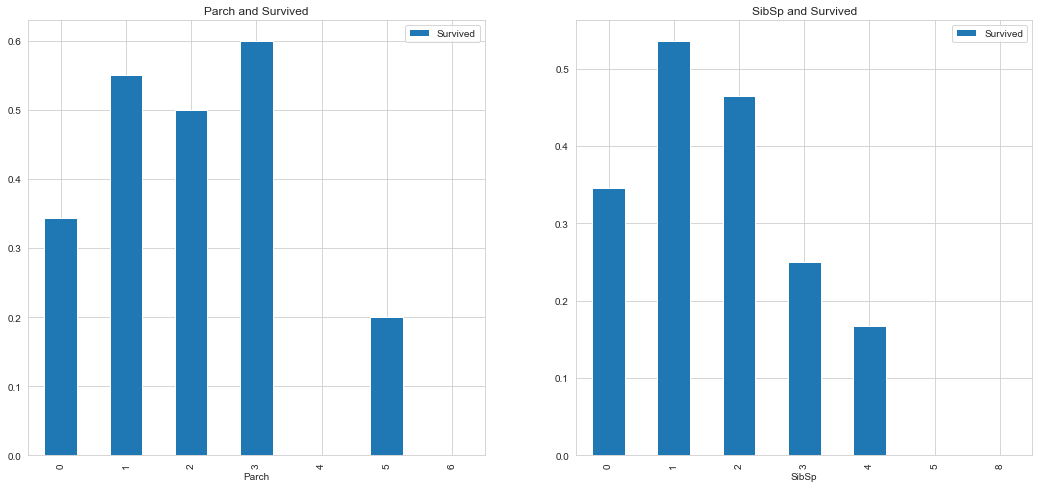

In [29]:
fig,ax = plt.subplots(1,2,figsize=(18,8))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')


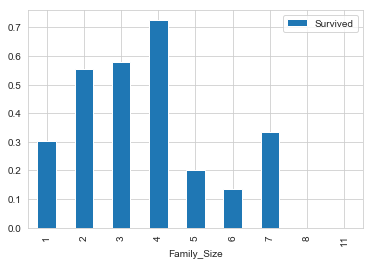

In [30]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

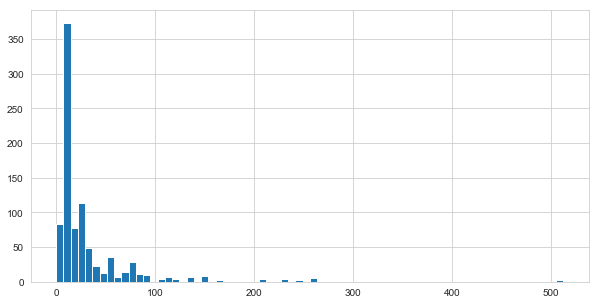

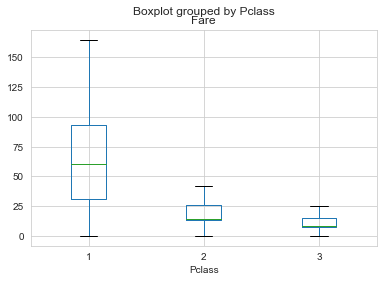

In [31]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins = 70)

train_data.boxplot(column='Fare',by='Pclass',showfliers=False)
plt.show()

In [32]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

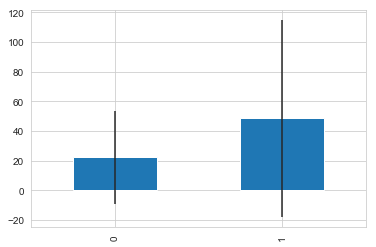

In [33]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()

In [34]:
fare_survived.std()

66.59699811829472

Text(0.5,1,'Embarked and Survived')

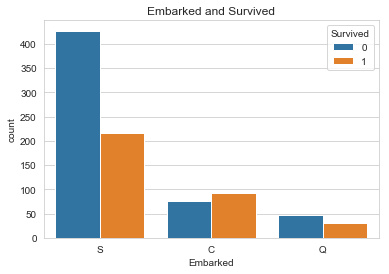

In [35]:
sns.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Embarked and Survived')

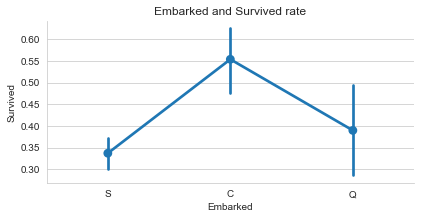

In [36]:
sns.factorplot('Embarked','Survived',data=train_data,size=3,aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

In [37]:
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'],axis=1,inplace=True)

In [38]:
embark_dummies = train_data[['S','C','Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
#replace missing values with 'U0'
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
#create feature for the alphabetical part of the cabin nuber
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile('([a-zA-Z+])').search(x).group())
#convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]


In [40]:
train_data['CabinLetter'].describe()

count    891.000000
mean       0.811448
std        1.815143
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: CabinLetter, dtype: float64

In [41]:
from sklearn import preprocessing

assert np.size(train_data['Age']) == 891

scaler = preprocessing.StandardScaler()

train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))

In [42]:
train_data['Age_scaled'].head()

0   -0.557771
1    0.607106
2   -0.266552
3    0.388692
4    0.388692
Name: Age_scaled, dtype: float64

In [43]:
train_data['Fare_bin'] = pd.qcut(train_data['Fare'],5)
train_data['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [44]:
#factorize
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]
#dummies
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns = lambda x:'Fare_'+str(x))
train_data = pd.concat([train_data,fare_bin_dummies_df],axis=1)


In [45]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,S,CabinLetter,Age_scaled,Fare_bin,Fare_bin_id,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,-0.557771,"(-0.001, 7.854]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0.607106,"(39.688, 512.329]",1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,-0.266552,"(7.854, 10.5]",2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0.388692,"(39.688, 512.329]",1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0.388692,"(7.854, 10.5]",2,0,1,0,0,0


In [46]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_int,Name_length,Family_Size,...,Q,S,CabinLetter,Age_scaled,Fare_bin_id,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.661183,0.523008,0.381594,32.204208,29.525253,26.965208,1.904602,...,0.086420,0.722783,0.811448,-3.946837e-17,1.997755,0.200898,0.206510,0.193042,0.202020,0.197531
std,257.353842,0.486592,0.836071,13.743062,1.102743,0.806057,49.693429,13.761050,9.281607,1.613459,...,0.281141,0.447876,1.815143,1.000562e+00,1.415800,0.400897,0.405028,0.394907,0.401733,0.398360
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,...,0.000000,0.000000,0.000000,-2.128900e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,21.000000,20.000000,1.000000,...,0.000000,0.000000,0.000000,-6.305761e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,28.000000,25.000000,1.000000,...,0.000000,1.000000,0.000000,-1.209422e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,37.000000,30.000000,2.000000,...,0.000000,1.000000,0.000000,5.343015e-01,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,82.000000,11.000000,...,1.000000,1.000000,8.000000,3.664910e+00,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values

AttributeError: 'DataFrame' object has no attribute 'Embarked'

In [64]:
#replace missing value with U0
train_data['Cabin'] = train_data.Cabin.fillna('U0')

In [18]:
#1. choose training data to predict age
age_df = train_data[['Age','Survived','Fare','Parch','SibSp','Pclass']]
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Age         891 non-null float64
Survived    891 non-null int64
Fare        891 non-null float64
Parch       891 non-null int64
SibSp       891 non-null int64
Pclass      891 non-null int64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [20]:

X = age_df.values[:,1:]
Y = age_df.values[:,0]
print('train data shape: ',X.shape)
print('train data shape: ',Y.shape)
#use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)

train data shape:  (891, 5)
train data shape:  (891,)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [112]:
train_df_org = pd.read_csv('train.csv')
test_df_org = pd.read_csv('test.csv')

In [116]:
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)
PassengerId = test_df_org['PassengerId']

In [117]:
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)

In [118]:
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]

#使用pd.get_dummies 获取one-hot 编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test,emb_dummies_df],axis=1)

In [119]:
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)